In [1]:
from random import *
import math

def draw(k_init, init, next, lbd):
    U = random()
    p = init
    S = init
    k = k_init
    while U > S:
        p = next(p, lbd, k)
        S += p
        k += 1
    return k

""" Bernoulli Law """
def bern(lbd):
    return random() < lbd


""" Geometric Law """
def next_geom(p, lbd, k):
    return lbd * p

def geom(lbd):
    return draw(0, (1 - lbd), next_geom, lbd)

def fast_geom(lbd):
    U = random()
    return (int)(math.floor(math.log(U) / math.log(lbd)))


""" Poisson Law """
def next_poiss(p, lbd, k):
    return lbd * p / (k + 1)

def poiss(lbd):
    return draw(0, math.exp(-lbd), next_poiss, lbd)

def non_zero_poiss(lbd):
    return draw(1, lbd / (math.exp(lbd) - 1), next_poiss, lbd)


""" Logarithmic Law """
def next_loga(p, lbd, k):
    return lbd * p * (k) / (k + 1)

def loga(lbd):
    return draw(1, -lbd / math.log(1 - lbd), next_loga, lbd)

In [2]:
def random_shuffle(sigma):
    n = len(sigma)
    for i in range(1,n):
        j = randint(0,i) # dans l'intervalle $[0..i]$ 
        sigma[i],sigma[j]=sigma[j],sigma[i] # échange les cases d'indices $i$ et $j$

def random_permutation(n):
    sigma = [ i for i in range(1,n+1) ]
    random_shuffle(sigma)
    return sigma

In [3]:
def genSkeleton(x):
    k = poiss(math.exp(x)-1)
    return [non_zero_poiss(x) for i in range(k)]

def genP(x):
    def label(s):
        size = sum(s)
        rand_perm = random_permutation(size)
        return size, [[rand_perm.pop() for i in range(j)] for j in s]

    p = genSkeleton(x)
    return label(p)

def genSizeSP(x):
    k = poiss(math.exp(x)-1)
    return sum([non_zero_poiss(x) for i in range(k)])

def genNumberOfDistinctParts(x):
    k = poiss(math.exp(x)-1)
    size = 0
    distcints = set()
    for _ in range(k):
        s = non_zero_poiss(x)
        size += s
        distcints.add(s)
    return size,len(distcints)

In [4]:
sp = genP(3)
print(sp)

(61, [[11, 6], [1, 17, 21, 61, 15], [52], [42, 13, 5, 12], [37, 35], [34, 2], [44, 3, 31, 40], [19, 16], [9, 23, 10], [27, 39, 36], [18, 56, 8, 14, 49], [54, 60, 24, 58], [41, 45, 43, 48, 59, 29], [20, 28, 7], [25, 33], [46, 55], [30, 50, 57, 4], [38, 32, 47, 53, 22, 51, 26]])


In [5]:
print(genNumberOfDistinctParts(6.5))

(4366, 15)


In [6]:
from collections import defaultdict
def counts_max_and_average(gen,nb):
    counts = defaultdict(int)
    discard = 0
    for i in range(nb):
        size = gen()
        counts[size] += 1
    m = max(counts.keys())
    l = [0]*(m+1)
    for k,v in counts.items():
        l[k] = v
    return discard, l, m, sum([i*l[i] for i in range(len(l))])/nb

n = 100_000
values = [1.5,2,2.5,3,5]
k = len(values)
l = [0]*k
for i in range(k):
    d, l[i], m, a = counts_max_and_average(lambda : genSizeSP(values[i]), n)
    print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(d,m,a))

trop grands = 0, taille max = 32, moyenne des tailles = 6.74167
trop grands = 0, taille max = 56, moyenne des tailles = 14.76745
trop grands = 0, taille max = 88, moyenne des tailles = 30.41572
trop grands = 0, taille max = 143, moyenne des tailles = 60.19387
trop grands = 0, taille max = 1053, moyenne des tailles = 741.90655


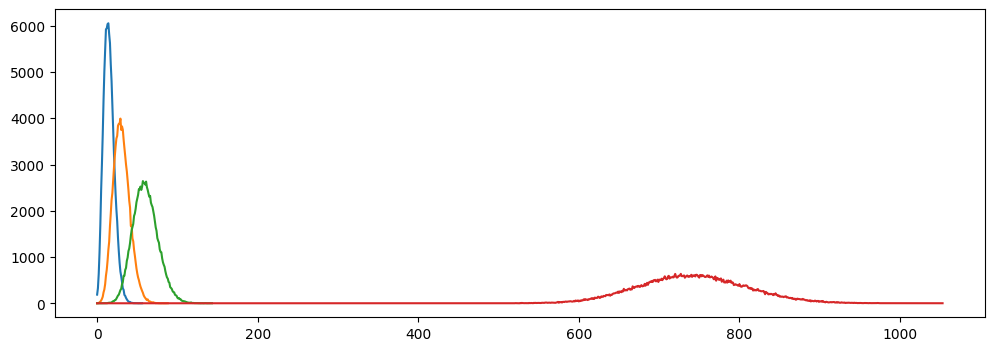

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

for i in range(1,k):
    plt.plot(l[i])
plt.show()

In [8]:
from collections import defaultdict

nb = 10_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
for val in [1,1.5,2,2.5,3,3.5,4,4.5,4.7,5]:
    for i in range(nb):
        size,d = genNumberOfDistinctParts(val)
        counts[size] += 1
        distincts[size] += d
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

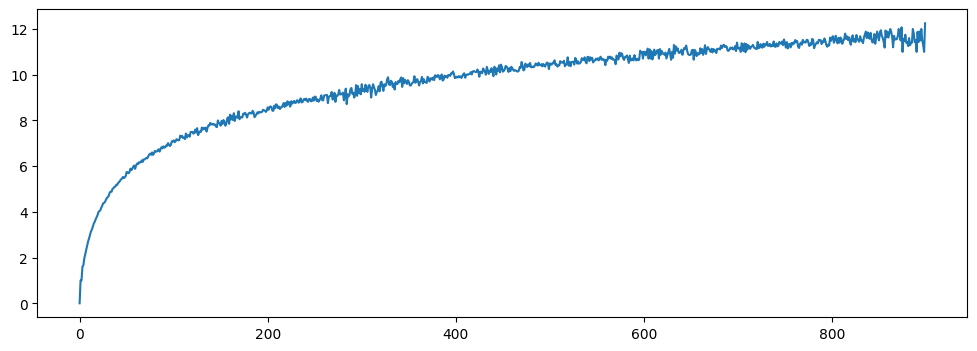

In [9]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l[:900])
plt.show()

In [18]:
from collections import defaultdict

nb = 1_000_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
val = .9
inc = (6.5-val)/nb
for i in range(nb):
    size,d = genNumberOfDistinctParts(val)
    counts[size] += 1
    distincts[size] += d
    val+=inc
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

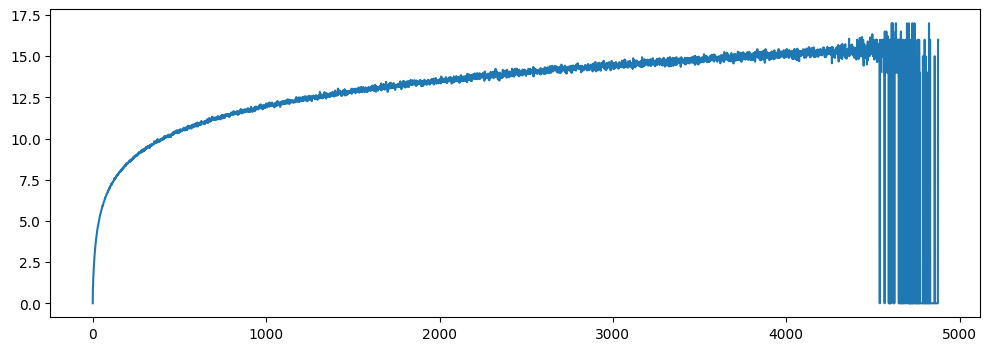

In [19]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l)
plt.show()